# Machine Learning Model

# LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Data Frame

In [2]:
DF = pd.read_csv("data.csv")
DF.head()

,a,b
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


##### Features

Extracting features from the data set.

In [3]:
x = np.vstack(DF[DF.columns[0]])

Appending 1 at the starting of each row.

In [4]:
ones = np.ones((len(x),1))
x = np.concatenate((ones, x), axis=1)

##### Label

Extracting label from the data set.

In [5]:
y = DF[DF.columns[-1]].to_numpy()

#### Initializing values

In [6]:
m = len(x)
theta = np.zeros(2)
h = np.zeros(m)

    m -> Total number of test (total number of rows)
    theta -> theta values
    h -> hypothesis function

### Gradient Desent

In [7]:
def Gradient(theta, h, y, x, m, alpha):
    tempSum = 0
    for i in range(m):
        for j in range(2):
            tempSum += (h[i]-y[i])*x[i][j]
            
    for k in range(len(theta)):
        theta[k] = theta[k] - ((alpha*tempSum)/m)
        
    return theta

### Hypothesis function

In [8]:
def Hypothesis(theta, x, h, m):
    for i in range(m):
        tempVal = 0
        for j in range(2):
            tempVal += theta[j]*x[i, j]
        h[i] = tempVal
    return h

### Cost function

In [9]:
def Cost(h, y, m):
    tempSum = 0
    for i in range(m):
        tempSum += (h[i]-y[i])**2
    j = tempSum/(2*m)
    return j

# main

In [10]:
alpha = 0.0000015
iterations = 10000

cost = []

for i in range(iterations):
    theta = Gradient(theta, h, y, x, m, alpha)
    h = Hypothesis(theta, x, h, m)
    j = Cost(h, y, m)
    cost.append(j)
    
print("theta value: ", theta, "\nHypothesis value: ", h, "\nCost value: ", j)

theta value:  [0.92069829 0.92069829] 
Hypothesis value:  [ 1.84139657  2.76209486  3.68279314  4.60349143  5.52418971  6.444888
  7.36558629  8.28628457  9.20698286 10.12768114 11.04837943 11.96907771
 12.889776   13.81047428 14.73117257 15.65187086 16.57256914 17.49326743
 18.41396571 19.334664   20.25536228 21.17606057 22.09675886 23.01745714
 23.93815543] 
Cost value:  0.16958247449468353


## MSE

In [11]:
mse = 0
for i in range(m):
    mse += ((h[i]-y[i])**2)
mse = mse/m
print("Mean Square Error: ", mse)

Mean Square Error:  0.33916494898936705


# Plot

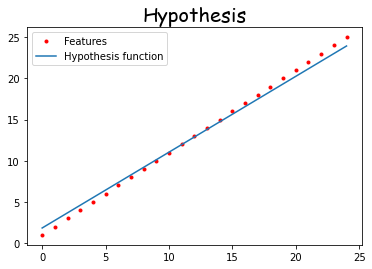

In [12]:
plt.title("Hypothesis", fontdict={'fontname': 'Comic Sans MS',
                                 'fontsize': 20})
plt.plot(x[:,1],'r.', label="Features")
plt.plot(h, label="Hypothesis function")
plt.legend()
plt.show()

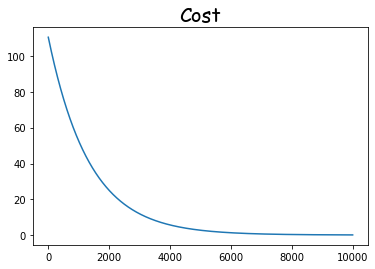

In [13]:
plt.title("Cost", fontdict={'fontname': 'Comic Sans MS',
                           'fontsize': 20})
plt.plot(cost)
plt.show()